<a href="https://colab.research.google.com/github/Joshi-Riya/Machine-Learning-Projects/blob/master/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing The Dataset 

---



In [2]:
dataset = pd.read_csv('CarPrice_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

# Missing Values

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


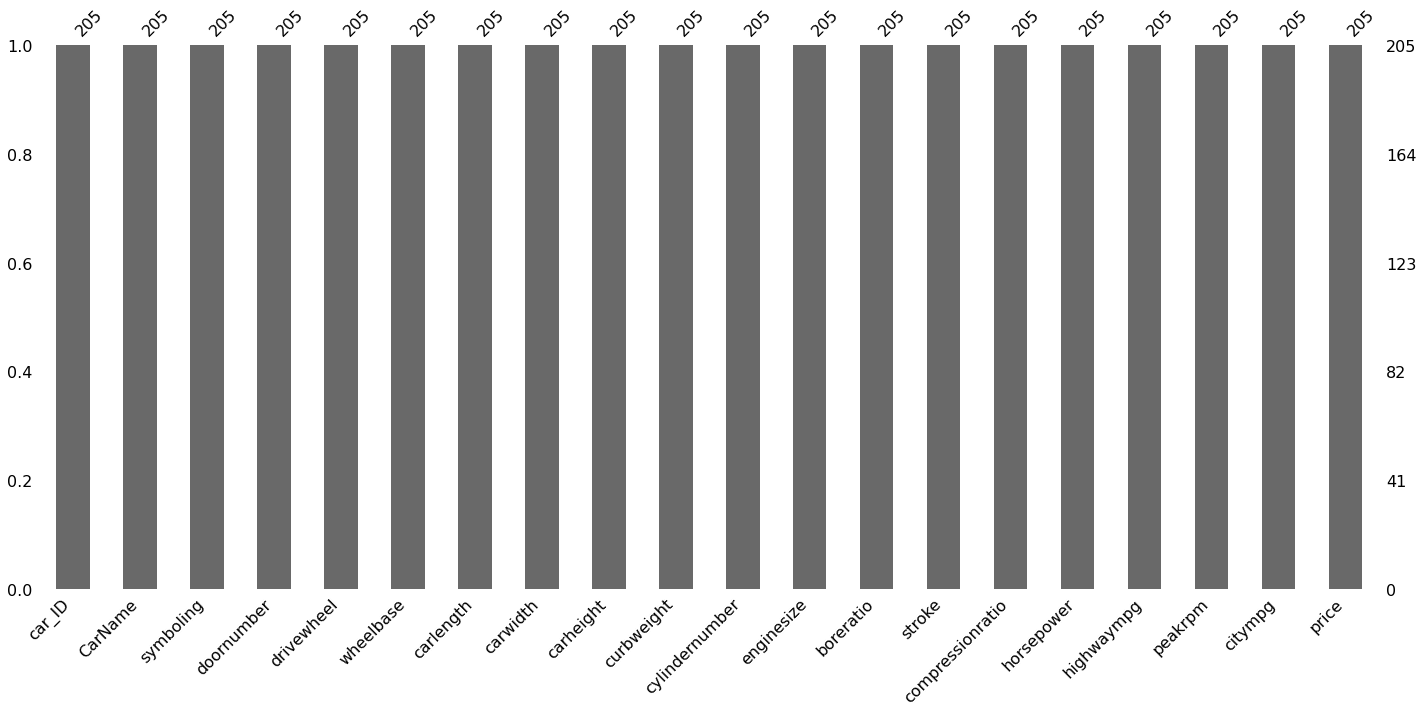

In [3]:
import missingno as msno
msno.bar(dataset)

# Encoding the categorical data

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

# Splitting the dataset into training set and test set

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

# Correlation matrix

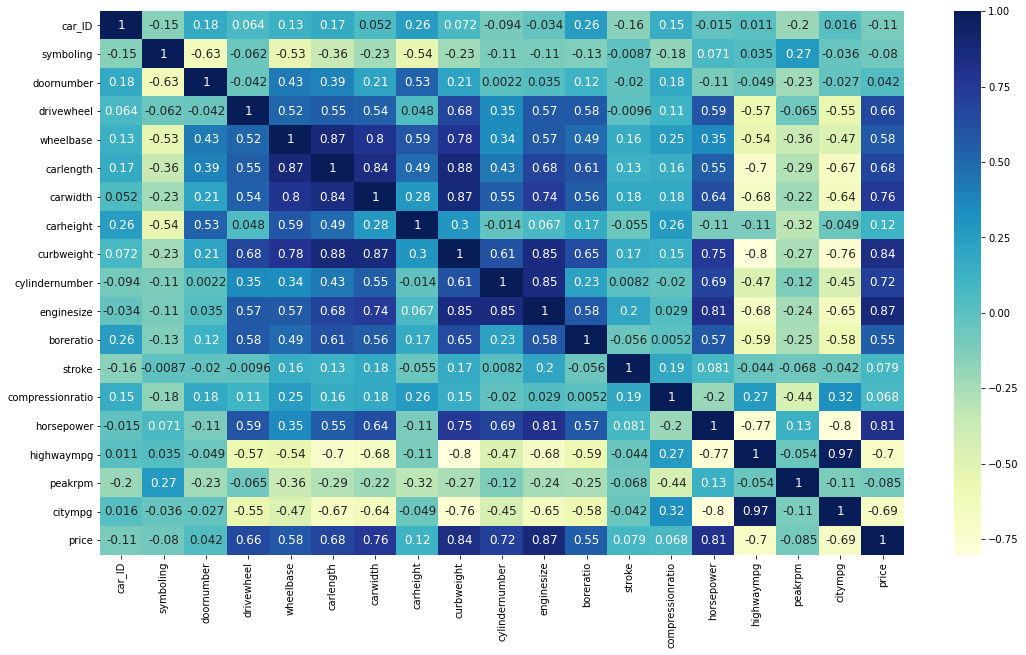

In [6]:
import seaborn as sn
df = pd.DataFrame(dataset)
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(18,10))
sn.heatmap(corrMatrix, annot = True, cmap ="YlGnBu", annot_kws={'size':12})
plt.show()

#**Positively Correlated Features**

In [7]:
import seaborn as sns
def plot_features(a, b) : 
  feature1 = dataset[a]
  feature2 = dataset[b]
  sct1 = sns.scatterplot(x = feature1, y = feature2,data = dataset)
  plt.subplot()

**Curbweight vs Carlength**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'curbweight vs carlength')

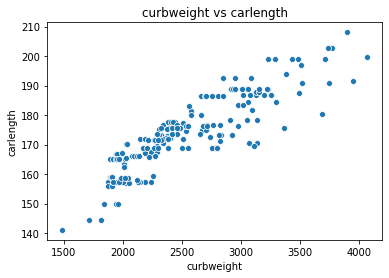

In [8]:
plot_features('curbweight','carlength')
plt.title('curbweight vs carlength')

**Wheelbase vs Carlength**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'wheelbase vs carlength')

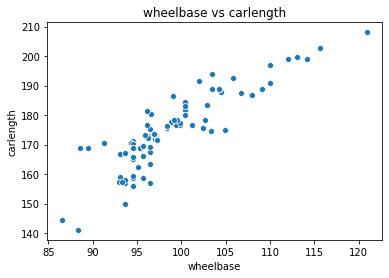

In [9]:
plot_features('wheelbase','carlength')
plt.title('wheelbase vs carlength')

#**Negatively Correlated Features**

**Highwaympg vs Carlength**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'highwaympg vs carlength')

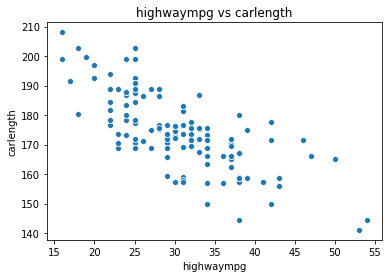

In [10]:
plot_features('highwaympg','carlength')
plt.title('highwaympg vs carlength')

**Highwaympg vs Carlength**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'citympg vs carlength')

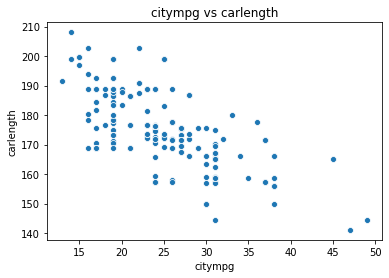

In [11]:
plot_features('citympg','carlength')
plt.title('citympg vs carlength')

# Investigating the relatioship between categorical and continuous variables
# (Drive Wheel vs Car Price)

[]

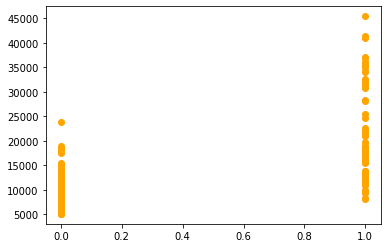

In [12]:
a = dataset.iloc[:, 4].values
b = dataset.iloc[:, 19].values
plt.scatter(a, b, color = 'orange')
plt.plot()

# **Multiple Linear Regression**

# Multiple Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the Test set results

In [14]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision =2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 6132.54  6669.  ]
 [ 6992.81  7999.  ]
 [ 5049.45  6338.  ]
 [ 7719.17  8916.5 ]
 [ 9043.38 10295.  ]
 [30942.66 25552.  ]
 [ 7007.54  8249.  ]
 [ 3659.73  5151.  ]
 [ 6562.05  6488.  ]
 [11436.02 10245.  ]
 [18798.84 17450.  ]
 [12880.52 17669.  ]
 [16548.46 16515.  ]
 [ 8469.83  9095.  ]
 [13088.08 12964.  ]
 [11994.66 11199.  ]
 [10602.95  9980.  ]
 [ 8594.17  6529.  ]
 [14729.71 18150.  ]
 [ 9995.32 11259.  ]
 [ 8685.26  8948.  ]
 [ 7769.18  6855.  ]
 [20420.37 16925.  ]
 [ 7690.21  7957.  ]
 [11727.31  9989.  ]
 [ 8755.92  7129.  ]
 [13192.6  14489.  ]
 [ 8766.11  7995.  ]
 [ 7391.38  6229.  ]
 [ 8797.71  7295.  ]
 [ 6194.99  8058.  ]
 [ 8396.48  8921.  ]
 [28899.19 41315.  ]
 [ 9687.85  9295.  ]
 [16316.   17950.  ]
 [ 7062.03  7775.  ]
 [ 8182.66  8558.  ]
 [34693.48 32250.  ]
 [14168.39 15645.  ]
 [18398.75 22625.  ]
 [ 6352.99  5118.  ]]


# Evaluating the model performance

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8679067257508718

#Scatter plot for y_pred and y_test

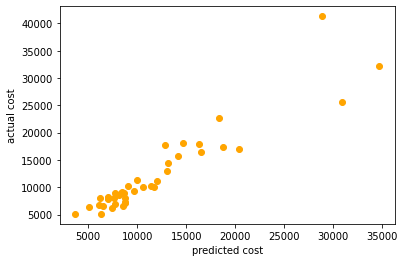

In [16]:
plt.scatter(y_pred, y_test, color = 'orange')
plt.xlabel('predicted cost')
plt.ylabel('actual cost')
plt.show()

# **T-TEST**

---



##**HYPOTHESIS 1** : Is the average carlength for class A and class B is nearly equal or same
## **Null Hypothesis** : There is no significant difference in  the average carlength
## **Alternate Hypothesis** : There is significant differnce in the average carlength


In [17]:
import random
np.random.seed(0)
Class = dataset.iloc[:,6].values
sample_size = 5
class_A = np.random.choice(Class,sample_size,replace=False)
class_B = np.random.choice(Class,sample_size,replace=False)

In [18]:
print(class_A.mean())
print(class_B.mean())

167.4
177.11999999999998


In [19]:
from scipy.stats import ttest_ind
stat,p_value = ttest_ind(class_A,class_B)
print("Statistics : ",stat)
print("p_value : ",p_value)

Statistics :  -0.8947022395544573
p_value :  0.3970653277234538


In [20]:
if p_value > 0.05:
  print("Same distribution i.e we are accepting the null hypothesis")
else:
  print("Different distribution i.e we are rejecting the null hypothesis")

Same distribution i.e we are accepting the null hypothesis


## **HYPOTHESIS 2** : Is the average carwidth for class A and class B is nearly equal or same
## **Null Hypothesis** : There is no significant difference in  the average carwidth
## **Alternate Hypothesis** : There is significant differnce in the average carwidth

In [21]:
import random
np.random.seed(0)
Class = dataset.iloc[:,7].values
sample_size = 5
class_A = np.random.choice(Class,sample_size,replace=False)
class_B = np.random.choice(Class,sample_size,replace=False)

In [22]:
print(class_A.mean())
print(class_B.mean())

64.56
66.84


In [23]:
from scipy.stats import ttest_ind
stat,p_value = ttest_ind(class_A,class_B)
print("Statistics : ",stat)
print("p_value : ",p_value)

Statistics :  -1.2961660922448497
p_value :  0.23105820280486522


In [24]:
if p_value > 0.05:
  print("Same distribution i.e we are accepting the null hypothesis")
else:
  print("Different distribution i.e we are rejecting the null hypothesis")

Same distribution i.e we are accepting the null hypothesis


# **ANOVA TEST**

---



## **Null Hypothesis** : There is no significant difference in  the mean
## **Alternate Hypothesis** : There is significant differnce in the mean

# Creating the groups

In [25]:
data_symboling = dataset['symboling']
data_price = dataset['price']
dc=[]
dt1=[]
dt2=[]
k=0
for i in data_symboling:
  if i==1:
    dc.append(data_price[k])
  if i==0:
    dt1.append(data_price[k])
  if i==2:
    dt2.append(data_price[k])
  k=k+1
dc = dc[:8]
dt1 = dt1[:10]
dt2 = dt2[:7]
# print(len(dt2))
dc = pd.Series(dc)
dt1 = pd.Series(dt1)
dt2 = pd.Series(dt2)

# Sample descriptive statistics

In [26]:
import scipy.stats as stats
print("Control Group\n")
print(dc.describe())
print('\nTreatment-1 group\n')
print(dt1.describe())
print('\nTreatment-2 group\n')
print(dt2.describe())

Control Group

count        8.000000
mean     14976.750000
std       7876.106394
min       5572.000000
25%       6356.500000
50%      17105.000000
75%      20158.750000
max      24565.000000
dtype: float64

Treatment-1 group

count       10.000000
mean     20697.916700
std      12335.295964
min       6575.000000
25%       9702.500000
50%      19414.583500
75%      28346.250000
max      41315.000000
dtype: float64

Treatment-2 group

count        7.000000
mean     11652.142857
std       5271.094682
min       5151.000000
25%       6667.000000
50%      13950.000000
75%      15840.000000
max      17450.000000
dtype: float64


# Shapiro-Wilk normality test

In [27]:
stats.shapiro(dc), stats.shapiro(dt1), stats.shapiro(dt2) 
# All p values are greater than threshold a = 0.05
# Hence we "fail to reject" the null hypothesis
# Conclusion: samples come from populations that follow normal distribution

((0.859350860118866, 0.11829843372106552),
 (0.9115338325500488, 0.29169386625289917),
 (0.8442835211753845, 0.1088862419128418))

# Levene variance test

In [28]:
stats.levene(dc, dt1, dt2)
# p value is greater than threshold a = 0.05
# Hence we "fail to reject" the null hypothesis
# Conclusion: samples come from populations with the same variance

LeveneResult(statistic=1.7938986863377677, pvalue=0.1897962191999984)

# Applying one way anova

In [29]:
F, p = stats.f_oneway(dc, dt1, dt2)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p))

F statistic = 2.002 and probability p = 0.159


In [30]:
if p>0.05:
  print("We are accepting the null hypothesis")
else:
  print("We are rejecting the null hypothesis")

We are accepting the null hypothesis


In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
val = ols('price ~ symboling',data =dataset).fit()
aov_table = sm.stats.anova_lm(val,type = 2)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
symboling    1.0  8.328034e+07  8.328034e+07  1.306852  0.254312
Residual   203.0  1.293636e+10  6.372591e+07       NaN       NaN
